# Principales étapes de la gestion de données issues de serveurs Web d'un log file:

1. Concaténer les fichiers de la base de données en utilisant la méthode concat().
2. Nettoyer les données:    
         2.1. nous vérifions qu'il n'y a pas de lignes NULL dans notre base de données.
         2.2. La deuxième étape est la suppression du contenu graphique (audio, video, images).
3. Faire des statistiques sur la base de données néttoyée.   

In [2]:
import pandas as pd 

In [3]:
#concaténation des 4 fichiers csv de la base de donnés
allFiles = [r'/home/omar/Projet python/part-00000.csv'
            ,r'/home/omar/Projet python/part-00001.csv'
            ,r'/home/omar/Projet python/part-00002.csv'
            ,r'/home/omar/Projet python/part-00003.csv'
            ,r'/home/omar/Projet python/part-00004.csv']

list_ = []

for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)

df = pd.concat(list_, axis = 0, ignore_index = True)

In [4]:
df.head(10)

,Host,End_point,Method,Response_code,Date-time,Content_size,Protol
0,in24.inetnebr.com,/shuttle/missions/sts-68/news/sts-68-mcc-05.txt,GET,200,1995-08-01 00:00:01,1839,HTTP/1.0
1,uplherc.upl.com,/,GET,304,1995-08-01 00:00:07,0,HTTP/1.0
2,uplherc.upl.com,/images/ksclogo-medium.gif,GET,304,1995-08-01 00:00:08,0,HTTP/1.0
3,uplherc.upl.com,/images/MOSAIC-logosmall.gif,GET,304,1995-08-01 00:00:08,0,HTTP/1.0
4,uplherc.upl.com,/images/USA-logosmall.gif,GET,304,1995-08-01 00:00:08,0,HTTP/1.0
5,ix-esc-ca2-07.ix.netcom.com,/images/launch-logo.gif,GET,200,1995-08-01 00:00:09,1713,HTTP/1.0
6,uplherc.upl.com,/images/WORLD-logosmall.gif,GET,304,1995-08-01 00:00:10,0,HTTP/1.0
7,slppp6.intermind.net,/history/skylab/skylab.html,GET,200,1995-08-01 00:00:10,1687,HTTP/1.0
8,piweba4y.prodigy.com,/images/launchmedium.gif,GET,200,1995-08-01 00:00:10,11853,HTTP/1.0
9,slppp6.intermind.net,/history/skylab/skylab-small.gif,GET,200,1995-08-01 00:00:11,9202,HTTP/1.0


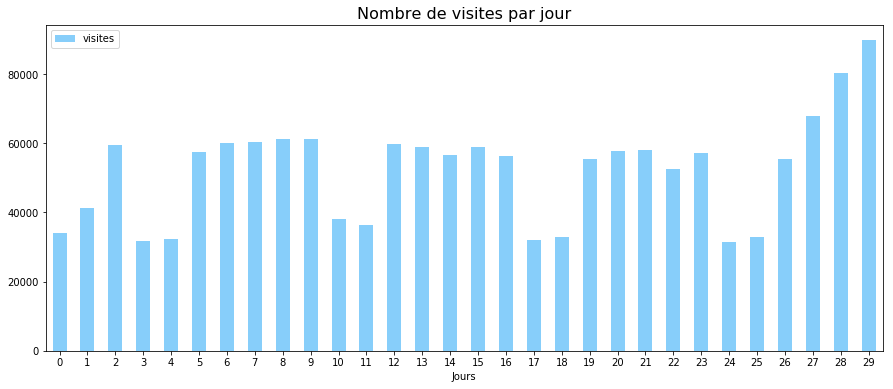

In [5]:
#Nombre de visites par jour

import matplotlib.pyplot as plt
%matplotlib inline

date_time=pd.to_datetime(df['Date-time'])
g=date_time.dt.day
hits=g.value_counts()
hits_counts=[hits[i] for i in range(1,32) if i!=2]
DataFrame= pd.DataFrame({'Jours':[i for i in range(30)],
    'visites':hits_counts}).plot.bar(x='Jours',y='visites',color='lightskyblue',
                                     figsize=(15, 6), rot=0)
plt.title('Nombre de visites par jour', fontsize=16)
plt.show()

In [6]:
#groupement du types de chaque requête 
get_request=df.loc[df['Method'] == 'GET']
post_request=df.loc[df['Method'] == 'POST']
head_request=df.loc[df['Method'] == 'HEAD']
#Exemple
get_request.head(3)

,Host,End_point,Method,Response_code,Date-time,Content_size,Protol
0,in24.inetnebr.com,/shuttle/missions/sts-68/news/sts-68-mcc-05.txt,GET,200,1995-08-01 00:00:01,1839,HTTP/1.0
1,uplherc.upl.com,/,GET,304,1995-08-01 00:00:07,0,HTTP/1.0
2,uplherc.upl.com,/images/ksclogo-medium.gif,GET,304,1995-08-01 00:00:08,0,HTTP/1.0


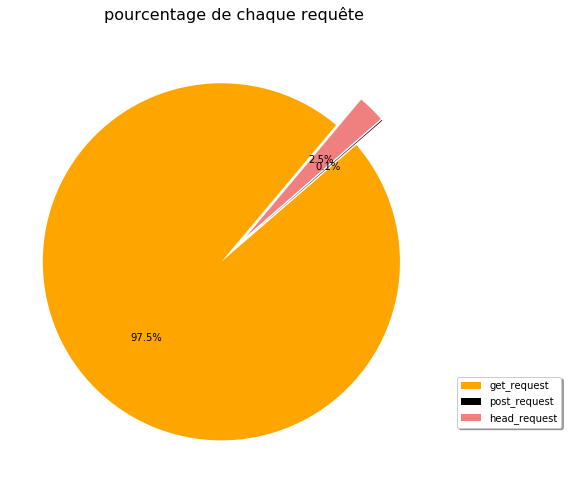

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,15),facecolor='white', edgecolor='white')
colors = ['orange', 'black', 'lightcoral']
values = [156903, 111,3965] 
explode=(0.1, 0.1,0.1) 
labels = ['get_request', 'post_request', 'head_request'] 
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
plt.pie(values, explode=explode,colors=colors ,autopct='%2.1f%%',
        shadow=False, startangle=50)
plt.legend(labels,loc=(1, 0.1), shadow=True)
plt.title('pourcentage de chaque requête', fontsize=16)
plt.show()

In [8]:
#nombre d'occurence de chacune des 'response_code'
reponse=df.groupby('Response_code').size()
print(list(zip(reponse.index,reponse.values)))

[(200, 1398207), (302, 26437), (304, 134138), (403, 171), (404, 10020), (500, 3), (501, 27)]


In [9]:
#conversion de la liste des tuple à deux listes comportent successivement indices et 
#les pourcentages des occurences
labels = reponse.index.tolist()
print(labels)
count =len(df)
fracs = list(reponse*100/count)
print (fracs)

[200, 302, 304, 403, 404, 500, 501]
[89.11436115800926, 1.684955350627118, 8.549250702516185, 0.010898640729176425, 0.6386221058850748, 0.00019120422331888467, 0.001720838009869962]


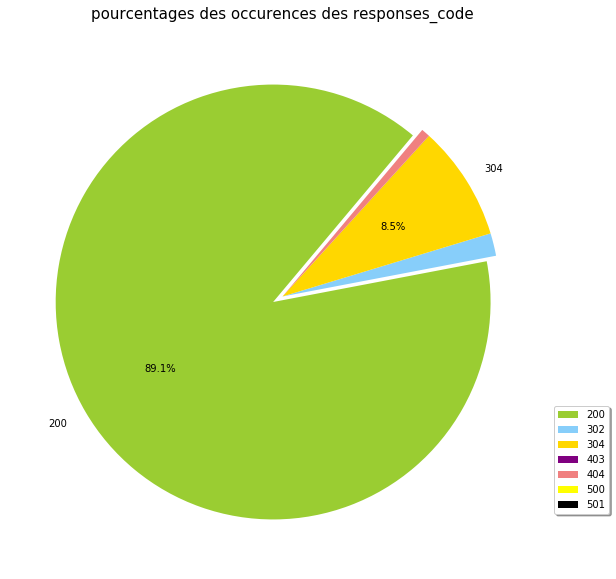

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

def pie_pct_format(value):   
    return '' if value < 7 else '%.1f%%' % value


fig = plt.figure(figsize=(10, 10), facecolor='white', edgecolor='white')
colors = ['yellowgreen', 'lightskyblue', 'gold', 'purple',
          'lightcoral', 'yellow', 'black']
explode = (0.05, 0, 0, 0, 0, 0, 0)
patches, texts, autotexts = plt.pie(fracs, labels=labels, colors=colors,
             explode=explode, autopct=pie_pct_format,shadow=False,  startangle=50)

for text, autotext in zip(texts, autotexts):
      if autotext.get_text() == '':
        text.set_text('')  
        

plt.legend(labels, loc=(1, 0.1), shadow=True)
plt.title("pourcentages des occurences des responses_code",fontsize=15)
plt.show()

In [11]:
#calcul de max min et la moyenne des tailles des contenus téléchargé sur la page
#en utilisant map reduce.

from functools import reduce


content_sizes=df['Content_size'].tolist()
print ('Moyenne du Content Size : %i, Min: %i, Max: %s' %(
    reduce((lambda a, b : a + b),content_sizes) / len(content_sizes),
    min(content_sizes),
    max(content_sizes)))

Moyenne du Content Size : 17097, Min: 0, Max: 3421948


In [12]:
#Top 10  End_points selon contenu téléchargé 
end_point=df.sort_values('Content_size')['End_point'].head(10)
end_point.index.name='Content_size'
end_point.to_frame().reset_index()

,Content_size,End_point
0,721172,/ksc.html
1,169344,/images/MOSAIC-logosmall.gif
2,169345,/images/USA-logosmall.gif
3,169346,/images/WORLD-logosmall.gif
4,169347,/shuttle/missions/sts-69/mission-sts-69.html
5,993908,/shuttle/missions/sts-69/sts-69-patch-small.gif
6,169349,/shuttle/missions/sts-69/sts-69-patch-small.gif
7,169350,/images/KSC-logosmall.gif
8,169351,/images/launch-logo.gif
9,169352,/history/apollo/images/apollo-logo1.gif


In [13]:
#Top 10  End_points selon l'acces
topEndpoints=df['End_point'].value_counts().head(10)
topEndpoints.index.name='End_point'
topEndpoints.to_frame('number of access').reset_index()

,End_point,number of access
0,/images/NASA-logosmall.gif,97384
1,/images/KSC-logosmall.gif,75332
2,/images/MOSAIC-logosmall.gif,67441
3,/images/USA-logosmall.gif,67061
4,/images/WORLD-logosmall.gif,66437
5,/images/ksclogo-medium.gif,62771
6,/ksc.html,43683
7,/history/apollo/images/apollo-logo1.gif,37824
8,/images/launch-logo.gif,35135
9,/,30327


In [14]:
#suppression du contenu graphique
not_graphic=[]
extention=['.gif','.png','.jpg']
for i in df.End_point:
    if i[-4:] not in extention:
        not_graphic.append(True)
    else :not_graphic.append(False)

In [15]:
non_graphique=pd.Series(not_graphic)

In [16]:
#dataframe sans contenu graphique
dataframe=df[non_graphique]

In [17]:
## Top 10  End_points selon contenu téléchargé(avec l'exclusion du contenu graphique) 
topEndpoints=dataframe['End_point'].value_counts().head(10)
topEndpoints.index.name='End_point'
topEndpoints.to_frame('number of access').reset_index()

,End_point,number of access
0,/ksc.html,43683
1,/,30327
2,/shuttle/missions/sts-69/mission-sts-69.html,24606
3,/shuttle/countdown/,24458
4,/shuttle/missions/missions.html,22451
5,/htbin/cdt_main.pl,17245
6,/icons/menu.xbm,12137
7,/icons/blank.xbm,12057
8,/software/winvn/winvn.html,10345
9,/icons/image.xbm,10308
